In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.formula.api as smf
%matplotlib inline

In [84]:

# Get today's date and data 5 years ago
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)

In [85]:
# Download stock data from Yahoo Finance
pltr = yf.download('PLTR', start=start_date, end=end_date)
aapl = yf.download('AAPL', start=start_date, end=end_date)
spy = yf.download('SPY', start=start_date, end=end_date)
gld = yf.download('GLD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [86]:
import os

os.makedirs('../data', exist_ok=True)

pltr.to_csv('../data/pltr.csv')
aapl.to_csv('../data/aapl.csv')
spy.to_csv('../data/spy.csv')
gld.to_csv('../data/gld.csv')

In [87]:
display (pltr.head())
display (aapl.head())
display (spy.head())
display (gld.head())


Price,Close,High,Low,Open,Volume
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR
Date,,,,,
2020-09-30,9.50,11.41,9.11,10.00,338584400
2020-10-01,9.46,10.10,9.23,9.69,124297600
2020-10-02,9.20,9.28,8.94,9.06,55018300
2020-10-05,9.03,9.49,8.92,9.43,36316900
2020-10-06,9.90,10.18,8.90,9.04,90864000


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-09-14,112.212715,112.767164,109.722560,111.590176,140150100
2020-09-15,112.387825,115.588068,110.510479,115.101709,184642000
2020-09-16,109.070854,112.835275,108.983313,112.086286,154679000
2020-09-17,107.329689,109.138945,105.744162,106.726609,178011000
2020-09-18,103.925163,107.854944,103.195625,107.388044,287104900


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2020-09-14,315.146240,316.934000,311.198308,314.243054,65605700
2020-09-15,316.738495,318.461041,315.155583,317.623040,52920900
2020-09-16,315.481445,319.429377,315.202093,317.986155,82096000
2020-09-17,312.706757,314.438651,310.053064,310.583808,91523300
2020-09-18,309.106537,313.631184,306.601159,313.519007,105877900


Price,Close,High,Low,Open,Volume
Ticker,GLD,GLD,GLD,GLD,GLD
Date,,,,,
2020-09-14,183.889999,184.300003,183.389999,183.570007,9709500
2020-09-15,183.449997,184.669998,182.919998,184.460007,7993700
2020-09-16,183.970001,185.009995,183.330002,184.979996,12702400
2020-09-17,182.960007,183.089996,181.479996,181.919998,8836200
2020-09-18,183.199997,184.089996,182.639999,183.070007,9959700


In [88]:
# print summary statistics for each stocks
display(pltr.describe())
display(aapl.describe())
display(spy.describe())
display(gld.describe())

Price,Close,High,Low,Open,Volume
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR
count,1243.000000,1243.000000,1243.000000,1243.000000,1.243000e+03
mean,33.856750,34.685122,32.900661,33.785121,6.007956e+07
std,38.245751,39.008125,37.232074,38.147665,4.240285e+07
min,6.000000,6.170000,5.920000,5.980000,9.126400e+06
25%,11.845000,12.145000,11.390000,11.930000,3.394220e+07
50%,21.400000,21.790001,20.930000,21.340000,4.731400e+07
75%,27.920000,28.845000,26.889999,28.045000,7.146630e+07
max,186.970001,190.000000,184.410004,189.000000,4.502905e+08


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,170.555659,172.278192,168.661539,170.394217,7.444379e+07
std,36.392068,36.573579,36.120976,36.329834,3.338938e+07
min,103.925163,107.183767,100.287194,101.687910,2.323470e+07
25%,142.509583,144.002173,140.684596,142.024001,5.063945e+07
50%,168.092880,169.509668,166.802170,167.919324,6.692180e+07
75%,194.509659,196.100701,192.897670,194.172184,8.987460e+07
max,258.103729,259.179926,256.718662,257.276679,3.186799e+08


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,451.282638,453.734846,448.406470,451.167742,7.557356e+07
std,86.465748,86.480978,86.279667,86.437670,2.944854e+07
min,301.618591,305.507433,298.963516,300.291009,2.604870e+07
25%,387.335052,389.904793,384.474503,387.224432,5.600695e+07
50%,424.701752,426.633910,422.465776,424.104416,7.059130e+07
75%,521.619415,523.876260,518.098360,521.420841,8.943210e+07
max,657.630005,658.330017,653.590027,654.179993,2.566114e+08


Price,Close,High,Low,Open,Volume
Ticker,GLD,GLD,GLD,GLD,GLD
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,198.858040,199.675307,197.939633,198.835801,8.157826e+06
std,44.330169,44.464110,44.022839,44.263558,4.089338e+06
min,151.229996,151.960007,150.570007,150.699997,1.436500e+06
25%,169.269997,169.894997,168.525002,169.210007,5.518950e+06
50%,179.240005,179.919998,178.369995,179.330002,7.214300e+06
75%,218.125000,219.044998,216.430000,217.885002,9.553900e+06
max,335.260010,338.309998,333.850006,337.029999,4.734770e+07


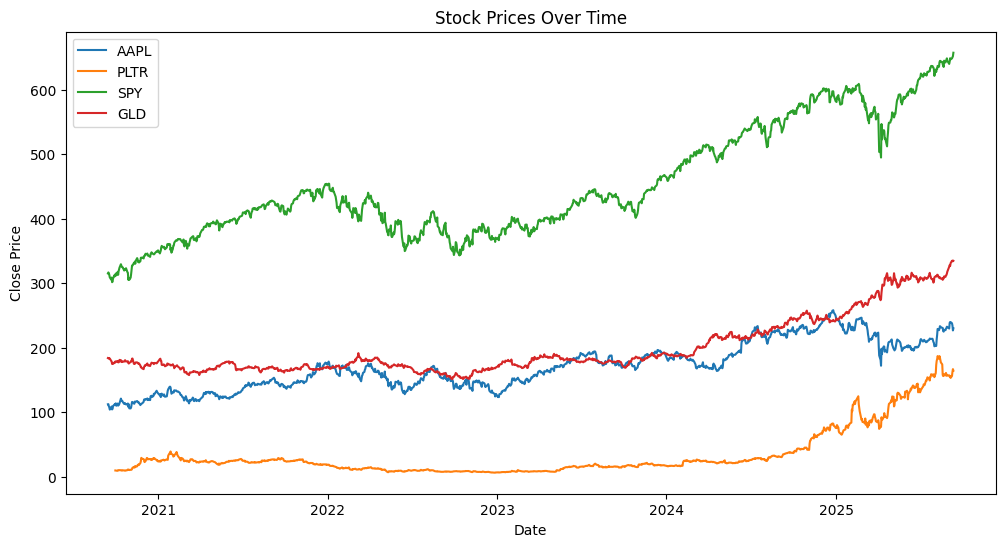

In [89]:
plt.figure(figsize = (12,6))
plt.plot(aapl.index, aapl['Close'], label='AAPL')
plt.plot(pltr.index, pltr['Close'], label='PLTR')
plt.plot(spy.index, spy['Close'], label='SPY')
plt.plot(gld.index, gld['Close'], label='GLD')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [90]:
# Create a new column Price Difference
pltr['Price Difference'] = pltr['Close'].shift(-1) - pltr['Close']
aapl['Price Difference'] = aapl['Close'].shift(-1) - aapl['Close']
spy['Price Difference'] = spy['Close'].shift(-1) - spy['Close']
gld['Price Difference'] = gld['Close'].shift(-1) - gld['Close']

#Display the first few rows of each dataframe to verify the new column
display(pltr.head())
display(aapl.head())
display(spy.head())
display(gld.head())

Price,Close,High,Low,Open,Volume,Price Difference
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR,
Date,,,,,,
2020-09-30,9.50,11.41,9.11,10.00,338584400,-0.04
2020-10-01,9.46,10.10,9.23,9.69,124297600,-0.26
2020-10-02,9.20,9.28,8.94,9.06,55018300,-0.17
2020-10-05,9.03,9.49,8.92,9.43,36316900,0.87
2020-10-06,9.90,10.18,8.90,9.04,90864000,0.10


Price,Close,High,Low,Open,Volume,Price Difference
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-09-14,112.212715,112.767164,109.722560,111.590176,140150100,0.175110
2020-09-15,112.387825,115.588068,110.510479,115.101709,184642000,-3.316971
2020-09-16,109.070854,112.835275,108.983313,112.086286,154679000,-1.741165
2020-09-17,107.329689,109.138945,105.744162,106.726609,178011000,-3.404526
2020-09-18,103.925163,107.854944,103.195625,107.388044,287104900,3.151604


Price,Close,High,Low,Open,Volume,Price Difference
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
2020-09-14,315.146240,316.934000,311.198308,314.243054,65605700,1.592255
2020-09-15,316.738495,318.461041,315.155583,317.623040,52920900,-1.257050
2020-09-16,315.481445,319.429377,315.202093,317.986155,82096000,-2.774689
2020-09-17,312.706757,314.438651,310.053064,310.583808,91523300,-3.600220
2020-09-18,309.106537,313.631184,306.601159,313.519007,105877900,-3.440155


Price,Close,High,Low,Open,Volume,Price Difference
Ticker,GLD,GLD,GLD,GLD,GLD,
Date,,,,,,
2020-09-14,183.889999,184.300003,183.389999,183.570007,9709500,-0.440002
2020-09-15,183.449997,184.669998,182.919998,184.460007,7993700,0.520004
2020-09-16,183.970001,185.009995,183.330002,184.979996,12702400,-1.009995
2020-09-17,182.960007,183.089996,181.479996,181.919998,8836200,0.239990
2020-09-18,183.199997,184.089996,182.639999,183.070007,9959700,-3.679993


In [91]:
# Create a new column for daily returns
pltr['Daily Return'] = pltr['Close'].pct_change()
aapl['Daily Return'] = aapl['Close'].pct_change()
spy['Daily Return'] = spy['Close'].pct_change()
gld['Daily Return'] = gld['Close'].pct_change()

display(pltr.head())


Price,Close,High,Low,Open,Volume,Price Difference,Daily Return
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR,,
Date,,,,,,,
2020-09-30,9.50,11.41,9.11,10.00,338584400,-0.04,NaN
2020-10-01,9.46,10.10,9.23,9.69,124297600,-0.26,-0.004211
2020-10-02,9.20,9.28,8.94,9.06,55018300,-0.17,-0.027484
2020-10-05,9.03,9.49,8.92,9.43,36316900,0.87,-0.018478
2020-10-06,9.90,10.18,8.90,9.04,90864000,0.10,0.096346


In [92]:
# Create a new column Direction
# Direction = 1 if Price Difference > 0 else 0
pltr['Direction'] = np.where(pltr['Price Difference'] > 0, 1, 0)
aapl['Direction'] = np.where(aapl['Price Difference'] > 0, 1, 0)
spy['Direction'] = np.where(spy['Price Difference'] > 0, 1, 0)
gld['Direction'] = np.where(gld['Price Difference'] > 0, 1, 0)
display(pltr.head())


Price,Close,High,Low,Open,Volume,Price Difference,Daily Return,Direction
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR,,,
Date,,,,,,,,
2020-09-30,9.50,11.41,9.11,10.00,338584400,-0.04,NaN,0
2020-10-01,9.46,10.10,9.23,9.69,124297600,-0.26,-0.004211,0
2020-10-02,9.20,9.28,8.94,9.06,55018300,-0.17,-0.027484,0
2020-10-05,9.03,9.49,8.92,9.43,36316900,0.87,-0.018478,1
2020-10-06,9.90,10.18,8.90,9.04,90864000,0.10,0.096346,1


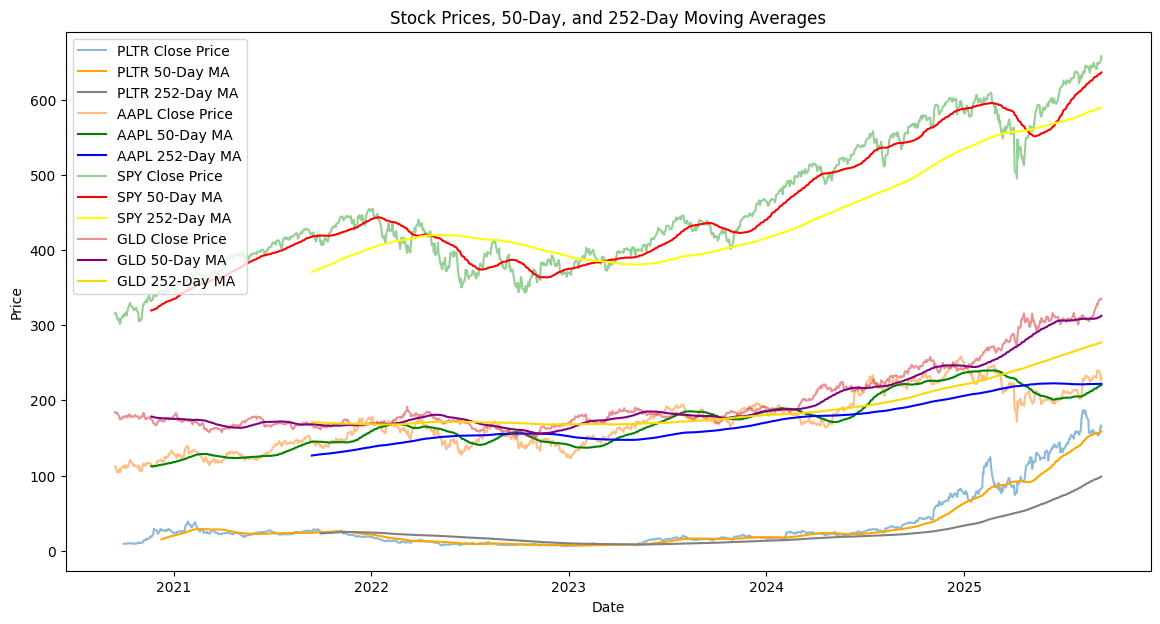

In [93]:
pltr['ma50'] = pltr['Close'].rolling(window=50).mean()
aapl['ma50'] = aapl['Close'].rolling(window=50).mean()
spy['ma50'] = spy['Close'].rolling(window=50).mean()
gld['ma50'] = gld['Close'].rolling(window=50).mean()
pltr['ma252'] = pltr['Close'].rolling(window=252).mean()
aapl['ma252'] = aapl['Close'].rolling(window=252).mean()
spy['ma252'] = spy['Close'].rolling(window=252).mean()
gld['ma252'] = gld['Close'].rolling(window=252).mean()

# Plot the closing prices and 50-day moving averages
plt.figure(figsize=(14, 7))
plt.plot(pltr.index, pltr['Close'], label='PLTR Close Price', alpha=0.5)
plt.plot(pltr.index, pltr['ma50'], label='PLTR 50-Day MA', color='orange')
plt.plot(pltr.index, pltr['ma252'], label='PLTR 252-Day MA', color='grey')
plt.plot(aapl.index, aapl['Close'], label='AAPL Close Price', alpha=0.5)
plt.plot(aapl.index, aapl['ma50'], label='AAPL 50-Day MA', color='green')
plt.plot(aapl.index, aapl['ma252'], label='AAPL 252-Day MA', color='blue')
plt.plot(spy.index, spy['Close'], label='SPY Close Price', alpha=0.5)
plt.plot(spy.index, spy['ma50'], label='SPY 50-Day MA', color='red')
plt.plot(spy.index, spy['ma252'], label='SPY 252-Day MA', color='yellow')
plt.plot(gld.index, gld['Close'], label='GLD Close Price', alpha=0.5)
plt.plot(gld.index, gld['ma50'], label='GLD 50-Day MA', color='purple')
plt.plot(gld.index, gld['ma252'], label='GLD 252-Day MA', color='gold')
plt.title('Stock Prices, 50-Day, and 252-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Distribution of Log Return PLTR

In [94]:
# Calculate the log daily return from each stock

pltr['Log Daily Return'] = np.log(pltr['Close']).shift(1) - np.log(pltr['Close'])
# AAPL data log daily return
aapl['Log Daily Return'] = np.log(aapl['Close']).shift(1) - np.log(aapl['Close'])
# SPY data log daily return
spy['Log Daily Return'] = np.log(spy['Close']).shift(1) - np.log(spy['Close'])
# GLD data log daily return
gld['Log Daily Return'] = np.log(gld['Close']).shift(1) - np.log(gld['Close'])


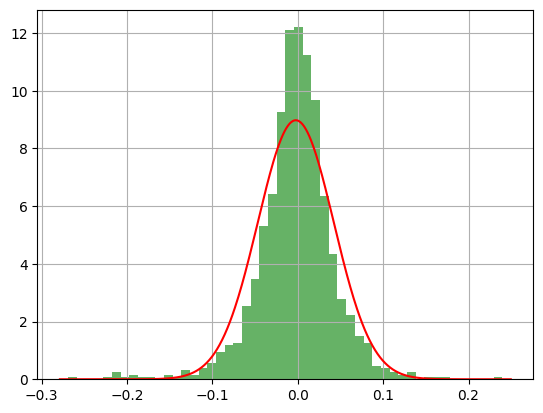

In [95]:
# Plot a histogram to show the distribution of log return of PLTR's stock. 
from scipy.stats import norm
mu = pltr['Log Daily Return'].mean()
sigma = pltr['Log Daily Return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(pltr['Log Daily Return'].min()-0.01, pltr['Log Daily Return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

pltr['Log Daily Return'].hist(bins=50, density=True, alpha=0.6, color='green')
plt.plot(density['x'], density['pdf'], 'r')
plt.show()



Calculate the Probability of the PLTR stockprice will drop over a certain percentage in a day

In [96]:
# probability that the stock price of PLTR will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print(f"The probability that the stock price of PLTR will drop over 5% in a day is {prob_return1:.4f}")

The probability that the stock price of PLTR will drop over 5% in a day is 0.1415


Calculate the Probability of the stockprice will drop over a certain percentage in a year

In [97]:
# drop over 40% in 220 days
prob_return2 = norm.cdf(-0.40, 220*mu, np.sqrt(220)*sigma)
print(f"The probability that the stock price of PLTR will drop over 40% in 220 days is {prob_return2:.4f}")


The probability that the stock price of PLTR will drop over 40% in 220 days is 0.5633


In [98]:
# drop over 20% in 220 days
prob_return2 = norm.cdf(-0.20,220*mu,np.sqrt(220)*sigma)
print(f"The probability that the stock price of PLTR will drop over 20% in 220 days is {prob_return2:.4f}")


The probability that the stock price of PLTR will drop over 20% in 220 days is 0.6782


Calculate Value at Risk (VaR)

In [99]:
# Calculate Value at Risk (VaR)
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 95% confidence level is {VaR_95:.4f}")


The 1-day VaR at 95% confidence level is -0.0754


In [100]:
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 50% confidence level is {VaR_50:.4f}")


The 1-day VaR at 50% confidence level is -0.0023


In [101]:
#Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, mu, sigma)
print(f"The 25% quantile of the daily log return is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, mu, sigma)
print(f"The 75% quantile of the daily log return is {quantile_75:.4f}")


The 25% quantile of the daily log return is -0.0323
The 75% quantile of the daily log return is 0.0277


AAPL STOCK HISTOGRAM

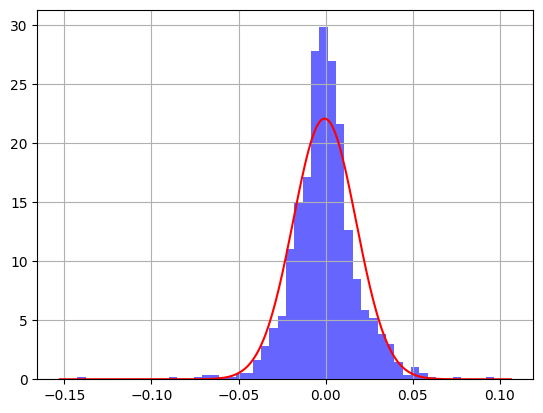

In [102]:
# Plot a histogram to show the distribution of log return of AAPL's stock. 
from scipy.stats import norm
mu = aapl['Log Daily Return'].mean()
sigma = aapl['Log Daily Return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(aapl['Log Daily Return'].min()-0.01, aapl['Log Daily Return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

aapl['Log Daily Return'].hist(bins=50, density=True, alpha=0.6, color='blue')
plt.plot(density['x'], density['pdf'], 'r')
plt.show()



Calculate the Probability of the AAPL stockprice will drop over a certain percentage in a day

In [103]:
# probability that the stock price of AAPL will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print(f"The probability that the stock price of AAPL will drop over 5% in a day is {prob_return1:.4f}")

The probability that the stock price of AAPL will drop over 5% in a day is 0.0031


Calculate the Probability of the AAPL stockprice will drop over a certain percentage in a year

In [104]:
# probability that the stock price of AAPL will drop over 40% in 220 days
prob_return2 = norm.cdf(-0.40, 220*mu, np.sqrt(220)*sigma)
print(f"The probability that the stock price of AAPL will drop over 40% in 220 days is {prob_return2:.4f}")

The probability that the stock price of AAPL will drop over 40% in 220 days is 0.1535


In [105]:
# probability that the stock price of AAPL will drop over 20% in 220 days
prob_return2 = norm.cdf(-0.20,220*mu,np.sqrt(220)*sigma)
print(f"The probability that the stock price of AAPL will drop over 20% in 220 days is {prob_return2:.4f}")


The probability that the stock price of AAPL will drop over 20% in 220 days is 0.3912


Calculate AAPL VaR

In [106]:
# Calculate Value at Risk (VaR) for AAPL
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 95% confidence level for AAPL is {VaR_95:.4f}")

The 1-day VaR at 95% confidence level for AAPL is -0.0303


In [107]:
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 50% confidence level for AAPL is {VaR_50:.4f}")

The 1-day VaR at 50% confidence level for AAPL is -0.0006


In [108]:
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, mu, sigma)
print(f"The 25% quantile of the daily log return for AAPL is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, mu, sigma)
print(f"The 75% quantile of the daily log return for AAPL is {quantile_75:.4f}")


The 25% quantile of the daily log return for AAPL is -0.0128
The 75% quantile of the daily log return for AAPL is 0.0116


SPY STOCK HISTOGRAM

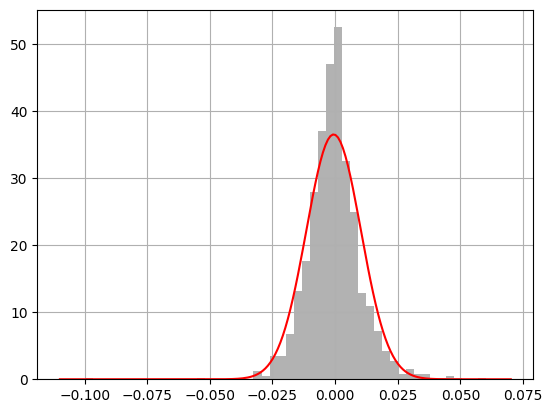

In [109]:
# Plot a histogram to show the distribution of log return of SPY's stock. 
from scipy.stats import norm
mu = spy['Log Daily Return'].mean()
sigma = spy['Log Daily Return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(spy['Log Daily Return'].min()-0.01, spy['Log Daily Return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

spy['Log Daily Return'].hist(bins=50, density=True, alpha=0.6, color='grey')
plt.plot(density['x'], density['pdf'], 'r')
plt.show()



Calculate the Probability of the SPY stockprice will drop over a certain percentage in a day

In [110]:
# probability that the stock price of SPY will drop over 5% in a day
prob_return1 = norm.cdf(-0.05,mu,sigma)
print(f"The probability that the stock price of SPY will drop over 5% in a day is {prob_return1:.4f}")

The probability that the stock price of SPY will drop over 5% in a day is 0.0000


Calculate the Probability of the SPY stockprice will drop over a certain percentage in a year

In [111]:
# probability that the stock price of SPY will drop over 40% in 220 days
prob_return2 = norm.cdf(-0.40, 220*mu, np.sqrt(220)*sigma)
print(f"The probability that the stock price of SPY will drop over 40% in 220 days is {prob_return2:.4f}")


The probability that the stock price of SPY will drop over 40% in 220 days is 0.0472


In [112]:
# probability that the stock price of SPY will drop over 20% in 220 days
prob_return2 = norm.cdf(-0.20,220*mu,np.sqrt(220)*sigma)
print(f"The probability that the stock price of SPY will drop over 20% in 220 days is {prob_return2:.4f}")

The probability that the stock price of SPY will drop over 20% in 220 days is 0.3307


Calculate the SPY Value at Risk VaR

In [113]:
# Calculate Value at Risk (VaR) for SPY
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 95% confidence level for SPY is {VaR_95:.4f}")


The 1-day VaR at 95% confidence level for SPY is -0.0185


In [114]:
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 50% confidence level for SPY is {VaR_50:.4f}")

The 1-day VaR at 50% confidence level for SPY is -0.0006


In [115]:
#Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, mu, sigma)
print(f"The 25% quantile of the daily log return for SPY is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, mu, sigma)
print(f"The 75% quantile of the daily log return for SPY is {quantile_75:.4f}")


The 25% quantile of the daily log return for SPY is -0.0080
The 75% quantile of the daily log return for SPY is 0.0068


THE HISTOGRAM OF GLD

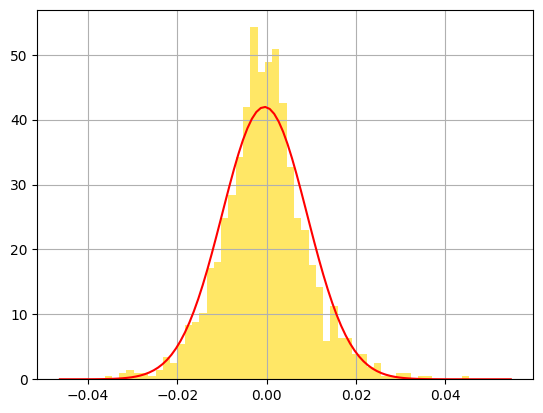

In [116]:
# Create the histogram of GLD
from scipy.stats import norm
mu = gld['Log Daily Return'].mean()
sigma = gld['Log Daily Return'].std(ddof=1)
density = pd.DataFrame()
density['x'] = np.arange(gld['Log Daily Return'].min()-0.01, gld['Log Daily Return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)
gld['Log Daily Return'].hist(bins=50, density=True, alpha=0.6, color='gold')
plt.plot(density['x'], density['pdf'], 'r')
plt.show()


Calculate the Probability of the GLD stockprice will drop over a certain percentage in a day

In [117]:
#probability that the stock price of GLD will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print(f"The probability that the stock price of GLD will drop over 5% in a day is {prob_return1:.4f}")

The probability that the stock price of GLD will drop over 5% in a day is 0.0000


Calculate the Probability of the GLD stockprice will drop over a certain percentage in a year

In [118]:
#probability that the stock price of GLD will drop over 40% in 220 days
prob_return2 = norm.cdf(-0.40, 220*mu, np.sqrt(220)*sigma)
print(f"The probability that the stock price of GLD will drop over 40% in 220 days is {prob_return2:.4f}")

The probability that the stock price of GLD will drop over 40% in 220 days is 0.0182


In [119]:
# probability that the stock price of GLD will drop over 20% in 220 days
prob_return2 = norm.cdf(-0.20,220*mu,np.sqrt(220)*sigma)
print(f"The probability that the stock price of GLD will drop over 20% in 220 days is {prob_return2:.4f}")

The probability that the stock price of GLD will drop over 20% in 220 days is 0.2505


Calculate Value at Risk (VaR) GLD

In [120]:
# Calculate Value at Risk (VaR) for GLD
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 95% confidence level for GLD is {VaR_95:.4f}")

The 1-day VaR at 95% confidence level for GLD is -0.0161


In [121]:
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, mu, sigma)
print(f"The 1-day VaR at 50% confidence level for AAPL is {VaR_50:.4f}")

The 1-day VaR at 50% confidence level for AAPL is -0.0005


In [122]:
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, mu, sigma)
print(f"The 25% quantile of the daily log return for GLD is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, mu, sigma)
print(f"The 75% quantile of the daily log return for GLD is {quantile_75:.4f}")

The 25% quantile of the daily log return for GLD is -0.0069
The 75% quantile of the daily log return for GLD is 0.0059


COVARIANCE

In [123]:
# Create a DataFrame to hold the log daily returns of all stocks
log_returns = pd.DataFrame({
    'PLTR': pltr['Log Daily Return'],
    'AAPL': aapl['Log Daily Return'],
    'SPY': spy['Log Daily Return'],
    'GLD': gld['Log Daily Return']
})  
display(log_returns.head())

,PLTR,AAPL,SPY,GLD
Date,,,,
2020-09-14,NaN,NaN,NaN,NaN
2020-09-15,NaN,-0.001559,-0.005040,0.002396
2020-09-16,NaN,0.029958,0.003977,-0.002831
2020-09-17,NaN,0.016092,0.008834,0.005505
2020-09-18,NaN,0.032234,0.011580,-0.001311


In [124]:
# Covariance matrix
cov_matrix = log_returns.cov()
display(cov_matrix)


,PLTR,AAPL,SPY,GLD
PLTR,0.001974,0.000293,0.000231,0.000023
AAPL,0.000293,0.000327,0.000150,0.000014
SPY,0.000231,0.000150,0.000119,0.000013
GLD,0.000023,0.000014,0.000013,0.000090


In [125]:
# Correlation matrix
corr_matrix = log_returns.corr()
display(corr_matrix)

,PLTR,AAPL,SPY,GLD
PLTR,1.000000,0.366571,0.476637,0.053884
AAPL,0.366571,1.000000,0.757690,0.082557
SPY,0.476637,0.757690,1.000000,0.128645
GLD,0.053884,0.082557,0.128645,1.000000


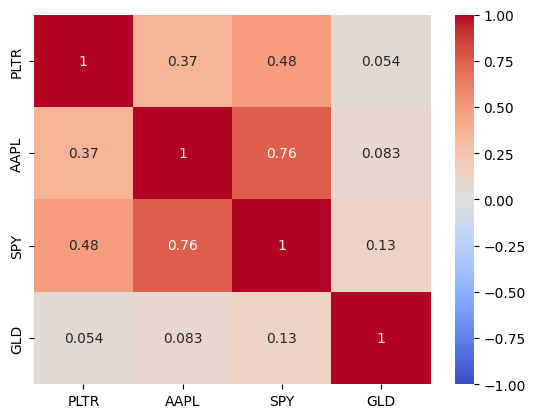

In [126]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

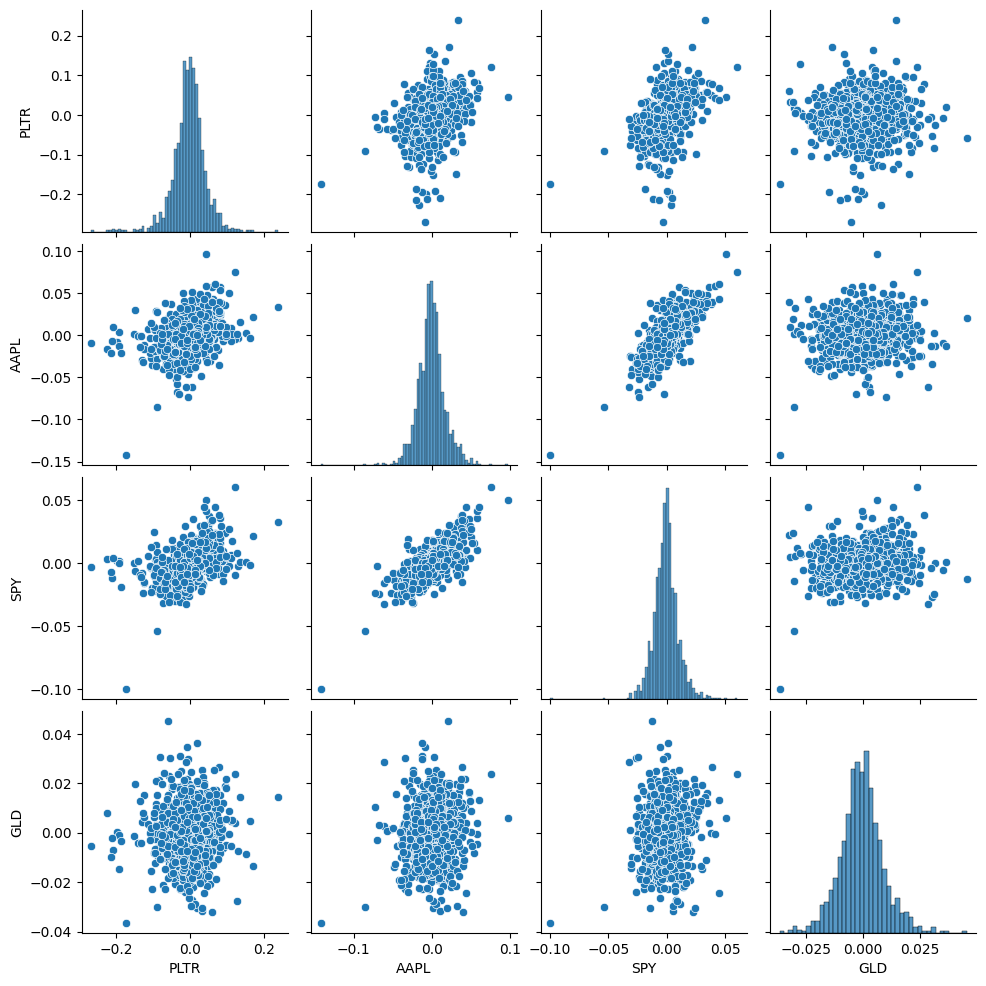

In [127]:
# Scatter plot matrix
sns.pairplot(log_returns)
plt.show()



In [128]:
# MonteCarlo Simulation for Portfolio Risk Assessment
num_simulations = 10000
num_days = 252  # Number of trading days in a year
results = np.zeros((num_simulations, num_days))
initial_investment = 100000  # Initial investment amount
for i in range(num_simulations):
    daily_returns = np.random.multivariate_normal(log_returns.mean(), cov_matrix, num_days)
    price_paths = initial_investment * np.exp(np.cumsum(daily_returns, axis=0))
    results[i] = price_paths[:, 0]  # Assuming we are tracking PLTR
# Calculate the 5th percentile of the final portfolio values
final_portfolio_values = results[:, -1]
VaR_95 = np.percentile(final_portfolio_values, 5)
print(f"The 1-year VaR at 95% confidence level for the portfolio is {initial_investment - VaR_95:.2f}")


The 1-year VaR at 95% confidence level for the portfolio is 82398.36


Monte Carlo VaR PLTR ONLY

The 1-year VaR at 95% confidence level for the portfolio is 82311.67
The 1-year VaR at 90% confidence level for the portfolio is 77019.65
The 1-year VaR at 50% confidence level for the portfolio is 44807.11


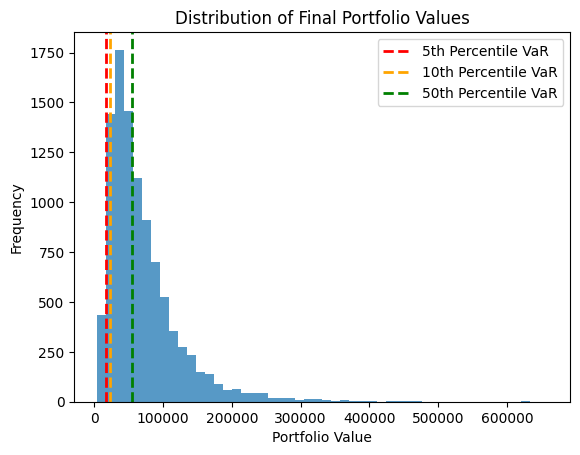

In [129]:
# Monte Carlo Simulation for Portfolio Risk Assessment (Log Returns)
num_simulations = 10000
num_days = 252  # Number of trading days in a year
results = np.zeros((num_simulations, num_days))
initial_investment = 100000  # Initial investment amount
for i in range(num_simulations):
    daily_returns = np.random.multivariate_normal(log_returns.mean(), cov_matrix, num_days)
    price_paths = initial_investment * np.exp(np.cumsum(daily_returns, axis=0))
    results[i] = price_paths[:, 0]  # Assuming we are tracking PLTR
# Calculate the percentage of the final portfolio values
final_portfolio_values = results[:, -1]
VaR_95 = np.percentile(final_portfolio_values, 5)
print(f"The 1-year VaR at 95% confidence level for the portfolio is {initial_investment - VaR_95:.2f}")
VaR_90 = np.percentile(final_portfolio_values, 10)
VaR_50 = np.percentile(final_portfolio_values, 50)
print(f"The 1-year VaR at 90% confidence level for the portfolio is {initial_investment - VaR_90:.2f}")
print(f"The 1-year VaR at 50% confidence level for the portfolio is {initial_investment - VaR_50:.2f}")

# Plot the distribution of final portfolio values
plt.hist(final_portfolio_values, bins=50, alpha=0.75)
plt.axvline(VaR_95, color='r', linestyle='dashed', linewidth=2, label='5th Percentile VaR')
plt.axvline(VaR_90, color='orange', linestyle='dashed', linewidth=2, label='10th Percentile VaR')
plt.axvline(VaR_50, color='green', linestyle='dashed', linewidth=2, label='50th Percentile VaR')
plt.title('Distribution of Final Portfolio Values')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [130]:
weights = np.array([0.25, 0.25, 0.25, 0.25])  # equal weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")
# Calculate the 1-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 1-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 1-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, portfolio_mu, portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, portfolio_mu, portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0010
Portfolio Standard Deviation of Log Return: 0.0157
The 1-day VaR at 95% confidence level for the portfolio is -0.0269
The 1-day VaR at 90% confidence level for the portfolio is -0.0211
The 1-day VaR at 50% confidence level for the portfolio is -0.0010
The 25% quantile of the daily log return for the portfolio is -0.0116
The 75% quantile of the daily log return for the portfolio is 0.0096


In [131]:
weights = np.array([0.30, 0.30, 0.20, 0.20])  # 30%,30%,20%,20% weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")
# Calculate the 1-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 1-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 1-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, portfolio_mu, portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, portfolio_mu, portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0011
Portfolio Standard Deviation of Log Return: 0.0179
The 1-day VaR at 95% confidence level for the portfolio is -0.0305
The 1-day VaR at 90% confidence level for the portfolio is -0.0240
The 1-day VaR at 50% confidence level for the portfolio is -0.0011
The 25% quantile of the daily log return for the portfolio is -0.0131
The 75% quantile of the daily log return for the portfolio is 0.0110


In [132]:
weights = np.array([0.40, 0.30, 0.20, 0.10]) # 40%,30%,20%,10% weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")
# Calculate the 1-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 1-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 1-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, portfolio_mu, portfolio_sigma)
print(f"The 1-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, portfolio_mu, portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, portfolio_mu, portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0013
Portfolio Standard Deviation of Log Return: 0.0219
The 1-day VaR at 95% confidence level for the portfolio is -0.0373
The 1-day VaR at 90% confidence level for the portfolio is -0.0293
The 1-day VaR at 50% confidence level for the portfolio is -0.0013
The 25% quantile of the daily log return for the portfolio is -0.0160
The 75% quantile of the daily log return for the portfolio is 0.0135


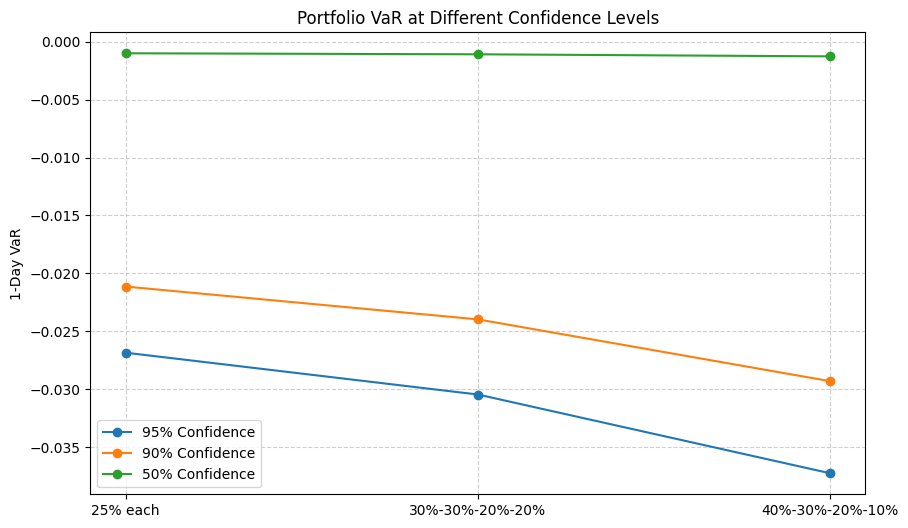

In [133]:
import matplotlib.pyplot as plt
import numpy as np

weights_list = [
    [0.25, 0.25, 0.25, 0.25],
    [0.30, 0.30, 0.20, 0.20],
    [0.40, 0.30, 0.20, 0.10]
]

labels = ['25% each', '30%-30%-20%-20%', '40%-30%-20%-10%']

VaR_dict = {"95%": [], "90%": [], "50%": []}

for weights in weights_list:
    portfolio_log_returns = log_returns.dot(weights)
    mu = portfolio_log_returns.mean()
    sigma = portfolio_log_returns.std(ddof=1)

    VaR_dict["95%"].append(norm.ppf(1 - 0.95, mu, sigma))
    VaR_dict["90%"].append(norm.ppf(1 - 0.90, mu, sigma))
    VaR_dict["50%"].append(norm.ppf(1 - 0.50, mu, sigma))

x = np.arange(len(labels))

plt.figure(figsize=(10,6))
plt.plot(x, VaR_dict["95%"], marker="o", label="95% Confidence")
plt.plot(x, VaR_dict["90%"], marker="o", label="90% Confidence")
plt.plot(x, VaR_dict["50%"], marker="o", label="50% Confidence")

plt.xticks(x, labels)
plt.ylabel("1-Day VaR")
plt.title("Portfolio VaR at Different Confidence Levels")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [134]:
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Equal weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")

# Calculate the 252-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 252-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 252-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0010
Portfolio Standard Deviation of Log Return: 0.0157
The 252-day VaR at 95% confidence level for the portfolio is -0.6612
The 252-day VaR at 90% confidence level for the portfolio is -0.5706
The 252-day VaR at 50% confidence level for the portfolio is -0.2508
The 25% quantile of the daily log return for the portfolio is -0.4191
The 75% quantile of the daily log return for the portfolio is -0.0824


In [135]:
weights = np.array([0.30, 0.30, 0.20, 0.20])  # 30%,30%,20%,20% weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")
# Calculate the 252-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 252-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 252-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0011
Portfolio Standard Deviation of Log Return: 0.0179
The 252-day VaR at 95% confidence level for the portfolio is -0.7394
The 252-day VaR at 90% confidence level for the portfolio is -0.6363
The 252-day VaR at 50% confidence level for the portfolio is -0.2729
The 25% quantile of the daily log return for the portfolio is -0.4642
The 75% quantile of the daily log return for the portfolio is -0.0817


In [136]:
weights = np.array([0.40, 0.30, 0.20, 0.10])  # 40%,30%,20%,10% weights for PLTR, AAPL, SPY, GLD
portfolio_log_returns = log_returns.dot(weights)
portfolio_mu = portfolio_log_returns.mean()
portfolio_sigma = portfolio_log_returns.std(ddof=1)
print(f"Portfolio Mean Log Return: {portfolio_mu:.4f}")
print(f"Portfolio Standard Deviation of Log Return: {portfolio_sigma:.4f}")
# Calculate the 252-day VaR at 95% confidence level for the portfolio
confidence_level = 0.95
VaR_95 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 95% confidence level for the portfolio is {VaR_95:.4f}")
# Calculate the 252-day VaR at 90% confidence level for the portfolio
confidence_level = 0.90
VaR_90 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 90% confidence level for the portfolio is {VaR_90:.4f}")
# Calculate the 252-day VaR at 50% confidence level for the portfolio
confidence_level = 0.5
VaR_50 = norm.ppf(1 - confidence_level, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 252-day VaR at 50% confidence level for the portfolio is {VaR_50:.4f}")
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 25% quantile of the daily log return for the portfolio is {quantile_25:.4f}")
# 75% Quantile
quantile_75 = norm.ppf(0.75, 252*portfolio_mu, np.sqrt(252)*portfolio_sigma)
print(f"The 75% quantile of the daily log return for the portfolio is {quantile_75:.4f}")


Portfolio Mean Log Return: -0.0013
Portfolio Standard Deviation of Log Return: 0.0219
The 252-day VaR at 95% confidence level for the portfolio is -0.8894
The 252-day VaR at 90% confidence level for the portfolio is -0.7632
The 252-day VaR at 50% confidence level for the portfolio is -0.3179
The 25% quantile of the daily log return for the portfolio is -0.5522
The 75% quantile of the daily log return for the portfolio is -0.0835


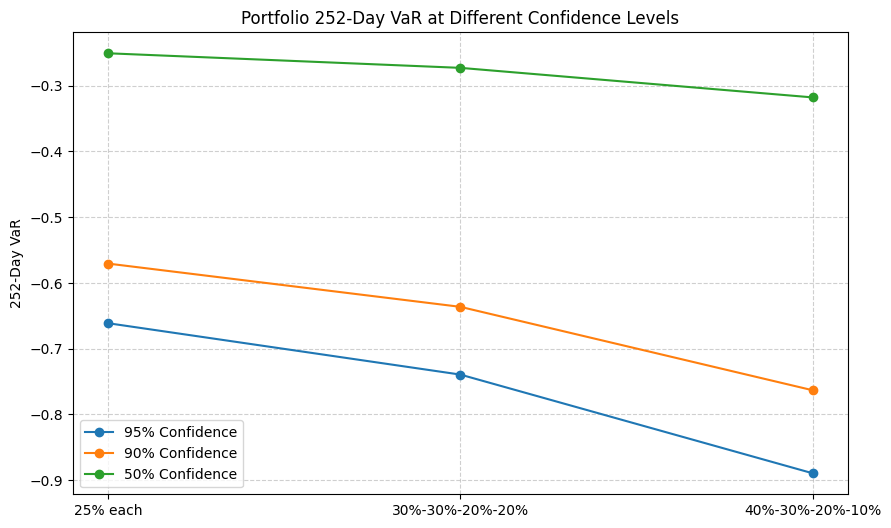

In [137]:
import matplotlib.pyplot as plt
import numpy as np

weights_list = [
    [0.25, 0.25, 0.25, 0.25],
    [0.30, 0.30, 0.20, 0.20],
    [0.40, 0.30, 0.20, 0.10]
]   
labels = ['25% each', '30%-30%-20%-20%', '40%-30%-20%-10%']
VaR_dict_252 = {"95%": [], "90%": [], "50%": []}
for weights in weights_list:
    portfolio_log_returns = log_returns.dot(weights)
    mu = portfolio_log_returns.mean()
    sigma = portfolio_log_returns.std(ddof=1)

    VaR_dict_252["95%"].append(norm.ppf(1 - 0.95, 252*mu, np.sqrt(252)*sigma))
    VaR_dict_252["90%"].append(norm.ppf(1 - 0.90, 252*mu, np.sqrt(252)*sigma))
    VaR_dict_252["50%"].append(norm.ppf(1 - 0.50, 252*mu, np.sqrt(252)*sigma))
x = np.arange(len(labels))
plt.figure(figsize=(10,6))
plt.plot(x, VaR_dict_252["95%"], marker="o", label="95% Confidence")
plt.plot(x, VaR_dict_252["90%"], marker="o", label="90% Confidence")
plt.plot(x, VaR_dict_252["50%"], marker="o", label="50% Confidence")
plt.xticks(x, labels)
plt.ylabel("252-Day VaR")
plt.title("Portfolio 252-Day VaR at Different Confidence Levels")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [138]:
import warnings
warnings.filterwarnings("ignore")

In [139]:
pltr.head()

Price,Close,High,Low,Open,Volume,Price Difference,Daily Return,Direction,ma50,ma252,Log Daily Return
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR,,,,,,
Date,,,,,,,,,,,
2020-09-30,9.50,11.41,9.11,10.00,338584400,-0.04,NaN,0,NaN,NaN,NaN
2020-10-01,9.46,10.10,9.23,9.69,124297600,-0.26,-0.004211,0,NaN,NaN,0.004219
2020-10-02,9.20,9.28,8.94,9.06,55018300,-0.17,-0.027484,0,NaN,NaN,0.027869
2020-10-05,9.03,9.49,8.92,9.43,36316900,0.87,-0.018478,1,NaN,NaN,0.018651
2020-10-06,9.90,10.18,8.90,9.04,90864000,0.10,0.096346,1,NaN,NaN,-0.091982


In [140]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model

panel = pd.DataFrame(index=pltr.index)

# Dependent variable: PLTR daily returns
panel['PLTR_ret'] = pltr['Close'].pct_change()

# Independent variables: AAPL, SPY, GLD daily returns
panel['AAPL_ret'] = aapl['Close'].pct_change()
panel['SPY_ret']  = spy['Close'].pct_change()
panel['GLD_ret']  = gld['Close'].pct_change()

In [141]:
# Drop missing values (first row will be NaN due to pct_change)
panel = panel.dropna()

In [142]:
# Define Y and X
Y = panel['PLTR_ret']
X = panel[['AAPL_ret', 'SPY_ret', 'GLD_ret']]

In [143]:
# Add constant for regression intercept
import statsmodels.api as sm
X = sm.add_constant(X)

In [144]:
# Run regression
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PLTR_ret   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     115.7
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           4.60e-66
Time:                        12:23:40   Log-Likelihood:                 2233.9
No. Observations:                1242   AIC:                            -4460.
Df Residuals:                    1238   BIC:                            -4439.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      1.785      0.0

In [145]:
# Create lagged independent variables (1-day lag)
panel['AAPL_ret_lag1'] = panel['AAPL_ret'].shift(1)
panel['SPY_ret_lag1']  = panel['SPY_ret'].shift(1)
panel['GLD_ret_lag1']  = panel['GLD_ret'].shift(1)

# Drop missing values after lagging
panel = panel.dropna()

In [146]:
Y = panel['PLTR_ret']
X = panel[['AAPL_ret', 'SPY_ret', 'GLD_ret',
           'AAPL_ret_lag1', 'SPY_ret_lag1', 'GLD_ret_lag1']]

import statsmodels.api as sm
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PLTR_ret   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     59.14
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           1.80e-64
Time:                        12:23:40   Log-Likelihood:                 2235.0
No. Observations:                1241   AIC:                            -4456.
Df Residuals:                    1234   BIC:                            -4420.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0021      0.001      1.832

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [148]:
# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


In [149]:
# Fit model on training set
model = sm.OLS(y_train, X_train).fit()

In [150]:
# Predict on test set
y_pred = model.predict(X_test)

In [151]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [152]:
print("Test RMSE:", rmse)
print("Test R²:", r2)

Test RMSE: 0.03798962553059688
Test R²: 0.2830343460438639


In [153]:
# Put results into a DataFrame for easy comparison
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}, index=y_test.index)

In [154]:
# Add signal column (up if Predicted > 0, down if Predicted < 0)
results["Signal"] = results["Predicted"].apply(lambda x: "📈 Up" if x > 0 else "📉 Down")

In [155]:
print(results.tail(10))  # Show last 10 rows

              Actual  Predicted  Signal
Date                                   
2025-08-28  0.008933   0.008633    📈 Up
2025-08-29 -0.008917  -0.010492  📉 Down
2025-09-02  0.002425  -0.016528  📉 Down
2025-09-03 -0.013941   0.010803    📈 Up
2025-09-04  0.008005   0.014020    📈 Up
2025-09-05 -0.019406  -0.001124  📉 Down
2025-09-08  0.019528   0.000118    📈 Up
2025-09-09  0.040102   0.000144    📈 Up
2025-09-10  0.026977   0.001291    📈 Up
2025-09-11 -0.014274   0.018598    📈 Up


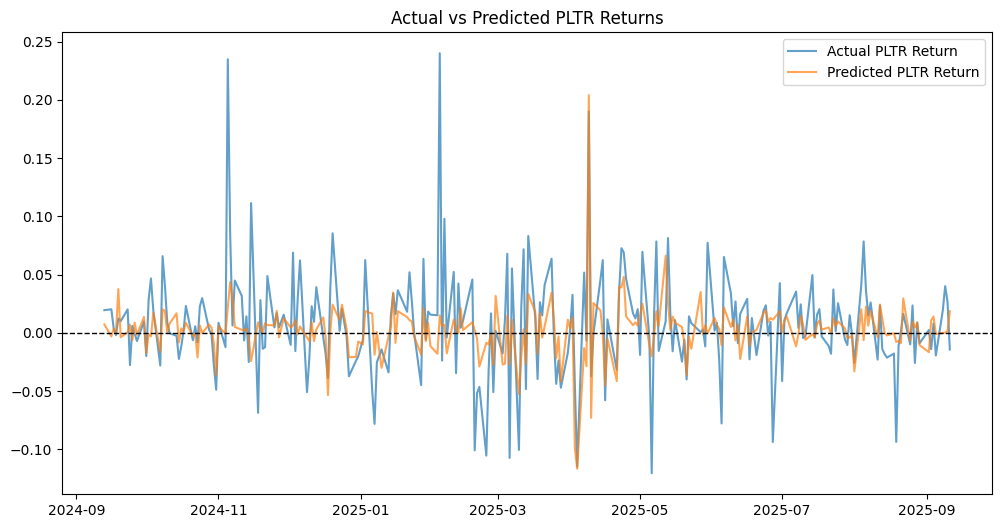

In [156]:
# Plot actual vs predicted returns
plt.figure(figsize=(12,6))
plt.plot(results.index, results["Actual"], label="Actual PLTR Return", alpha=0.7)
plt.plot(results.index, results["Predicted"], label="Predicted PLTR Return", alpha=0.7)
plt.axhline(0, color="black", linewidth=1, linestyle="--")  # Zero line
plt.legend()
plt.title("Actual vs Predicted PLTR Returns")
plt.show()

In [157]:
# Compare actual vs predicted direction
results["Correct"] = ((results["Actual"] > 0) & (results["Predicted"] > 0)) | \
                     ((results["Actual"] < 0) & (results["Predicted"] < 0))

accuracy = results["Correct"].mean() * 100
print(f"Directional Accuracy: {accuracy:.2f}%")

Directional Accuracy: 67.47%


In [158]:
# Take the last row of features 
latest_X = X.iloc[[-1]]   # double brackets keep it as DataFrame

# Predict tomorrow's PLTR return
predicted_tomorrow = model.predict(latest_X)[0]

print("Predicted PLTR return for tomorrow:", predicted_tomorrow)

if predicted_tomorrow > 0:
    print("📈 Model suggests PLTR will go UP tomorrow")
else:
    print("📉 Model suggests PLTR will go DOWN tomorrow")

Predicted PLTR return for tomorrow: 0.018598096913356246
📈 Model suggests PLTR will go UP tomorrow
